In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter

import timeit

In [38]:
def cosinus_signal_func(freq = None, T = None, init_phase = 0):
    if freq:
        w = 2 * np.pi * freq
    elif T:
        w = 2 * np.pi / T
    else:
        return None
    cos_func = lambda t: np.cos(t * w + init_phase)

    return cos_func

def calc_signal(s_func, t_start = 0, t_end = None, t_step = None):
    if t_end is None:
        t_end = 2
    if t_step is None:
        t_step = 0.01

    time_series = np.arange(t_start, t_end, t_step)
    signal_vals = np.array([s_func(t) for t in time_series])

    return signal_vals, time_series

In [39]:
cos_50hz_f  = cosinus_signal_func(freq= 50)
cos_150hz_f = cosinus_signal_func(freq= 150)
cos_450hz_f = cosinus_signal_func(freq= 450)

cos_50hz_signal, t_series_50hz = calc_signal(cos_50hz_f, t_end=0.1, t_step=0.0001)
cos_150hz_signal, t_series_150hz = calc_signal(cos_150hz_f, t_end=0.1, t_step=0.0001)
cos_450hz_signal, t_series_450hz = calc_signal(cos_450hz_f, t_end=0.1, t_step=0.0001)

cos_signal = cos_50hz_signal + cos_150hz_signal + cos_450hz_signal
spectrum_cos_signal = np.fft.fft(cos_signal)
xfs = np.linspace(0, 10000, t_series_150hz.shape[0])

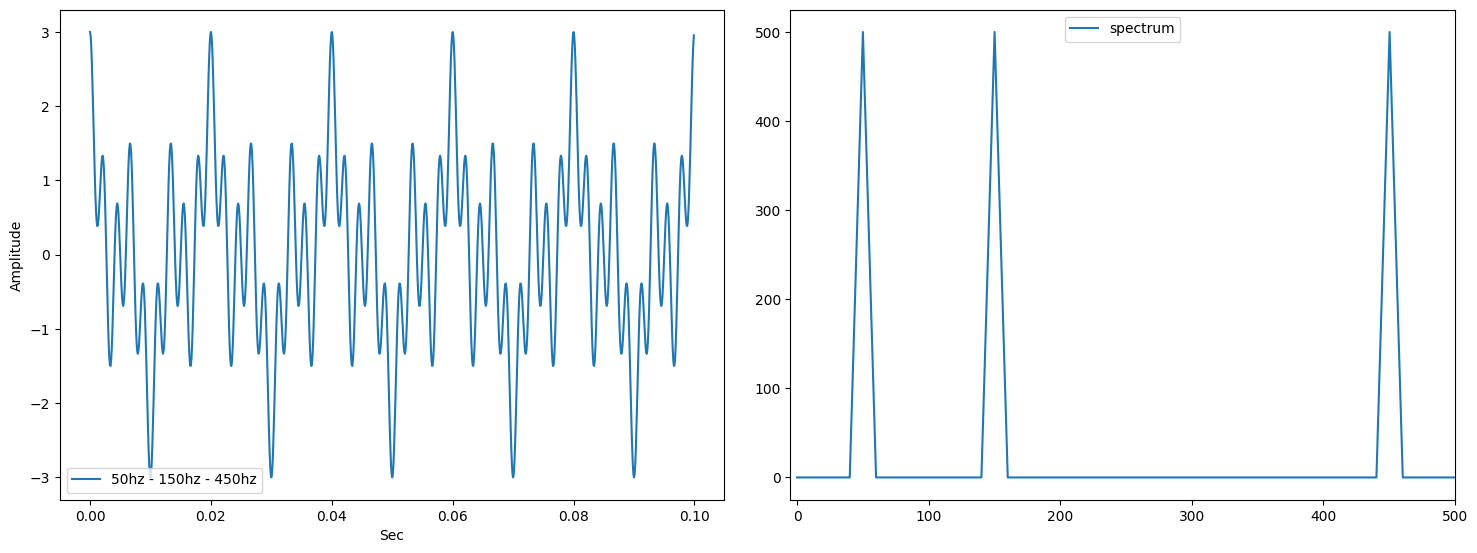

In [52]:
fig = plt.figure(figsize=(18, 14))
plt.subplots_adjust(wspace=0.1, hspace=0.2)

plt.subplot(221)
plt.plot(t_series_450hz, cos_signal, label="50hz - 150hz - 450hz")
plt.legend()
plt.xlabel("Sec")
plt.ylabel("Amplitude")

plt.subplot(222)
plt.plot(xfs, spectrum_cos_signal, label="spectrum")
plt.xlim([-5,500])
plt.legend()

plt.show()

In [41]:
def butterwort_low(w, wc):
  return wc**2 / ((-w**2) + (1j) * np.sqrt(2)*wc*w + wc**2)

filter_L_freq = butterwort_low(xfs, 70)
filtered_L_spectrum = spectrum_cos_signal[0:xfs.shape[0]]*filter_L_freq

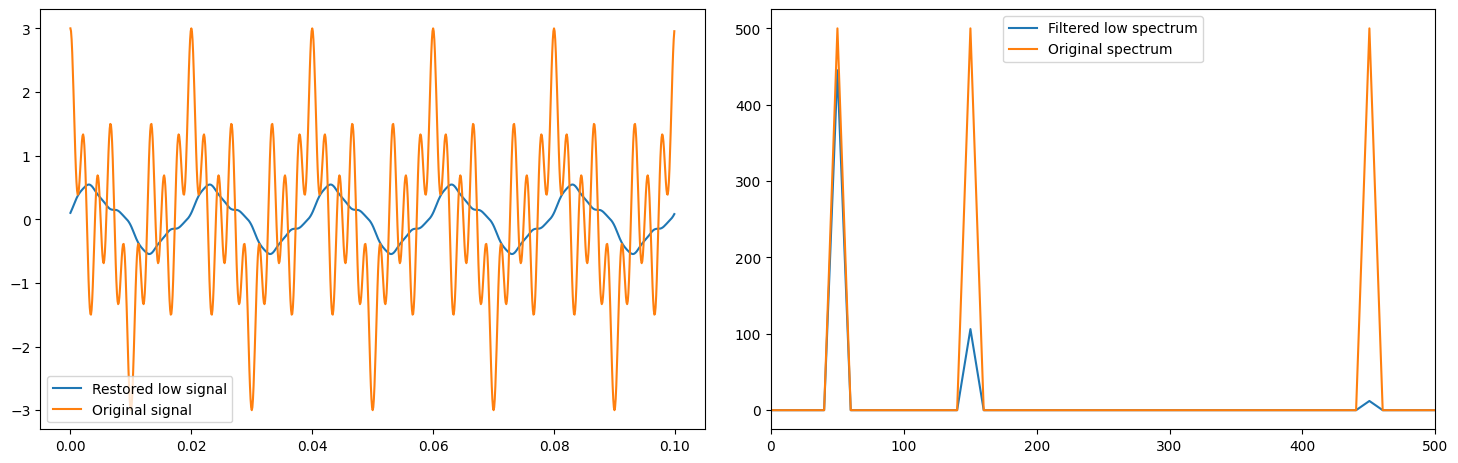

In [42]:
restored_filtred_L_signal = np.fft.ifft(filtered_L_spectrum)

fig = plt.figure(figsize=(18, 12))
plt.subplots_adjust(wspace=0.1, hspace=0.2)

plt.subplot(221)
plt.plot(t_series_150hz, restored_filtred_L_signal, label='Restored low signal')
plt.plot(t_series_150hz, cos_signal, label='Original signal')
plt.legend()

plt.subplot(222)
plt.plot(xfs, abs(filtered_L_spectrum), label='Filtered low spectrum')
plt.plot(xfs, spectrum_cos_signal, label="Original spectrum")
plt.legend()
plt.xlim([0, 500])

plt.show()

In [43]:
def butterwort_high(w, wc):
  return w**2 / ((-wc**2) + 1j*np.sqrt(2) * wc * w + w**2)

filter_H_freq = butterwort_high(xfs, 300)
filtered_H_spectrum = spectrum_cos_signal[0:xfs.shape[0]]*filter_H_freq

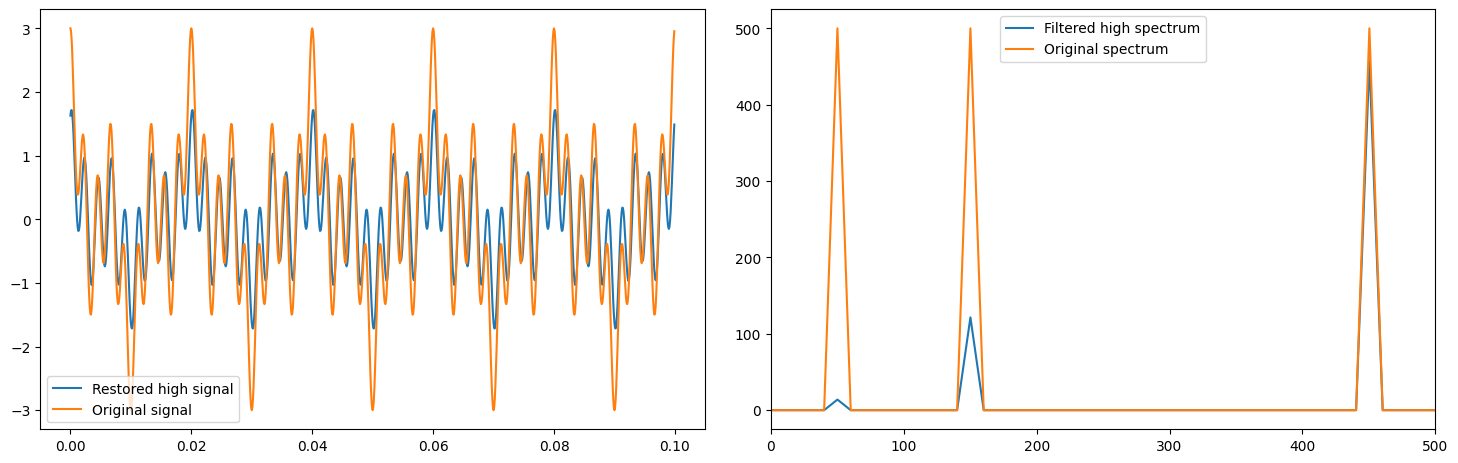

In [44]:
restored_filtred_H_signal = np.fft.ifft(filtered_H_spectrum)

fig = plt.figure(figsize=(18, 12))
plt.subplots_adjust(wspace=0.1, hspace=0.2)

plt.subplot(221)
plt.plot(t_series_150hz, restored_filtred_H_signal, label='Restored high signal')
plt.plot(t_series_150hz, cos_signal, label='Original signal')
plt.legend()

plt.subplot(222)
plt.plot(xfs, abs(filtered_H_spectrum), label="Filtered high spectrum")
plt.plot(xfs, spectrum_cos_signal, label="Original spectrum")
plt.legend()
plt.xlim([0, 500])

plt.show()

In [45]:
filter_band_freq = butterwort_high(xfs, 160) * butterwort_low(xfs, 120)
filtered_band_spectrum = spectrum_cos_signal[0:xfs.shape[0]]*filter_band_freq

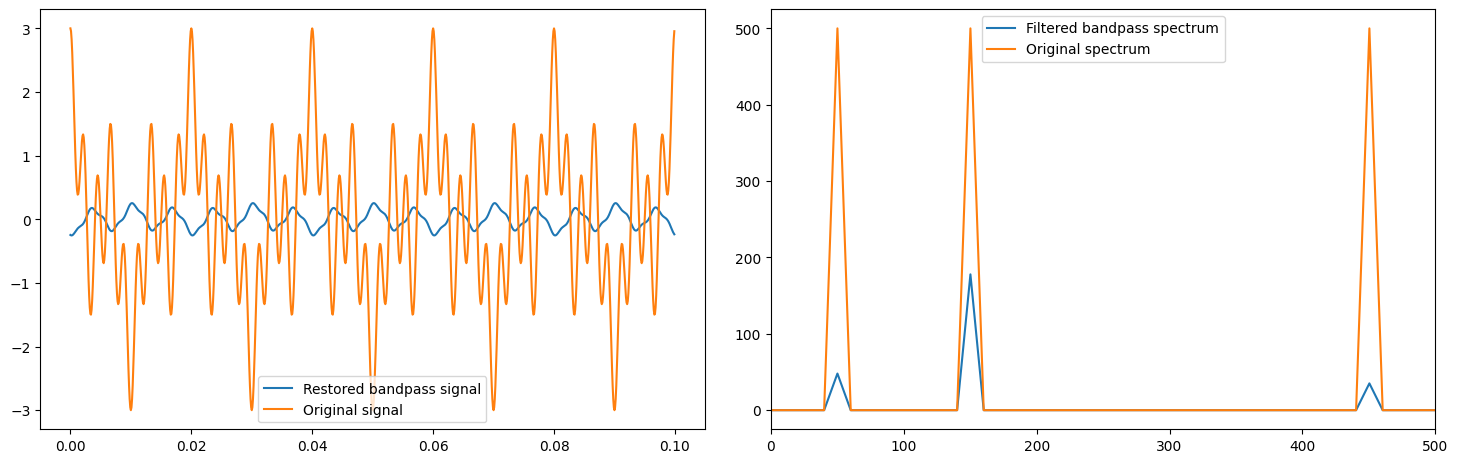

In [46]:
restored_filtred_band_signal = np.fft.ifft(filtered_band_spectrum)

fig = plt.figure(figsize=(18, 12))
plt.subplots_adjust(wspace=0.1, hspace=0.2)

plt.subplot(221)
plt.plot(t_series_150hz, restored_filtred_band_signal, label='Restored bandpass signal')
plt.plot(t_series_150hz, cos_signal, label='Original signal')
plt.legend()

plt.subplot(222)
plt.plot(xfs, abs(filtered_band_spectrum), label="Filtered bandpass spectrum")
plt.plot(xfs, spectrum_cos_signal, label="Original spectrum")
plt.legend()
plt.xlim([0, 500])

plt.show()

In [47]:
filter_Buff_freq = butterwort_high(xfs, 300) + butterwort_low(xfs, 70)
filtered_Buf_spectrum = spectrum_cos_signal[0:xfs.shape[0]]*filter_Buff_freq

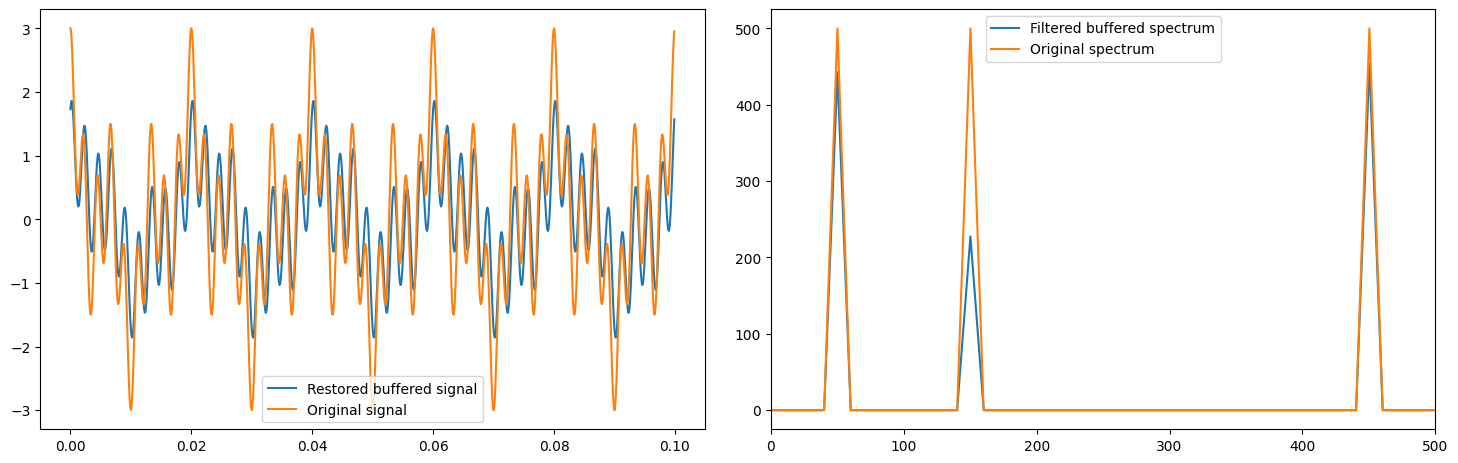

In [48]:
restored_filtred_Buf_signal = np.fft.ifft(filtered_Buf_spectrum)

fig = plt.figure(figsize=(18, 12))
plt.subplots_adjust(wspace=0.1, hspace=0.2)

plt.subplot(221)
plt.plot(t_series_150hz, restored_filtred_Buf_signal, label='Restored buffered signal')
plt.plot(t_series_150hz, cos_signal, label='Original signal')
plt.legend()

plt.subplot(222)
plt.plot(xfs, abs(filtered_Buf_spectrum), label="Filtered buffered spectrum")
plt.plot(xfs, spectrum_cos_signal, label="Original spectrum")
plt.legend()
plt.xlim([0, 500])

plt.show()

NameError: name 'n' is not defined